In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#import data
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [4]:
# group by genre and calculate the average total streams
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams


Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

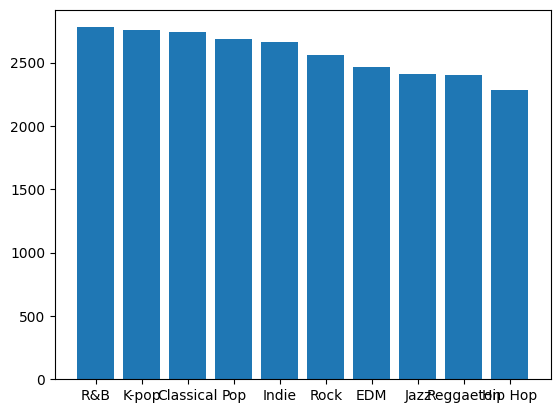

In [5]:
#Create a bar chart of average total streams by genre
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

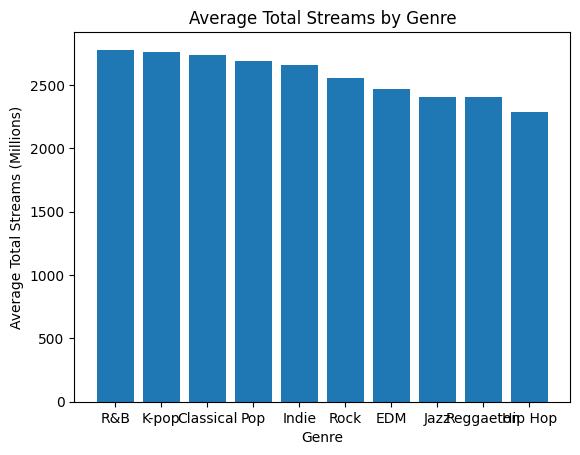

In [6]:
#add title and axis labels
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.show()

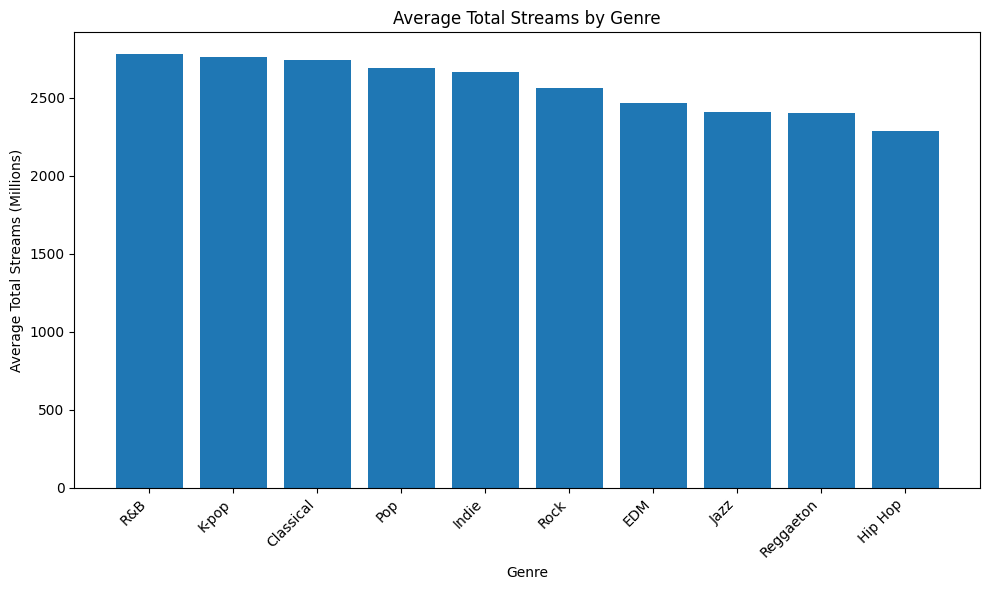

In [7]:
#adjust figure size and rotate x-axis labels for better readability
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

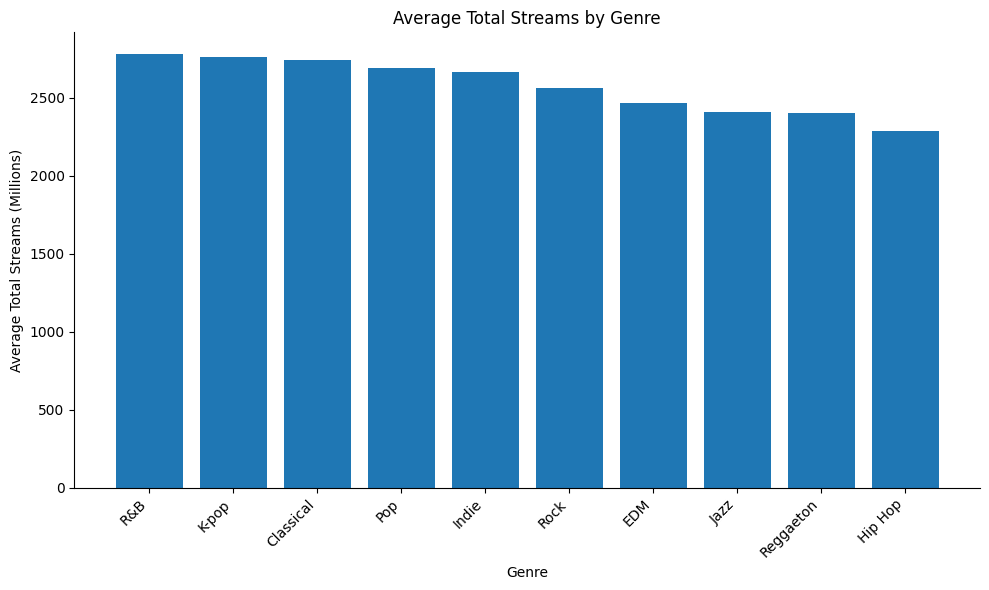

In [8]:
#remove top and right spines for a cleaner look
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)   

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [9]:
# group by artist and calculate the average total streams
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams


Artist
Dua Lipa          3008.270000
Ariana Grande     2869.031111
BTS               2824.987955
BLACKPINK         2763.213243
Bad Bunny         2655.404000
Billie Eilish     2650.803548
Doja Cat          2649.965588
Drake             2611.255161
The Weeknd        2523.978000
Ed Sheeran        2510.267143
Olivia Rodrigo    2481.721765
Post Malone       2415.280323
Karol G           2344.262432
Taylor Swift      2270.203333
SZA               1919.527000
Name: Total Streams (Millions), dtype: float64

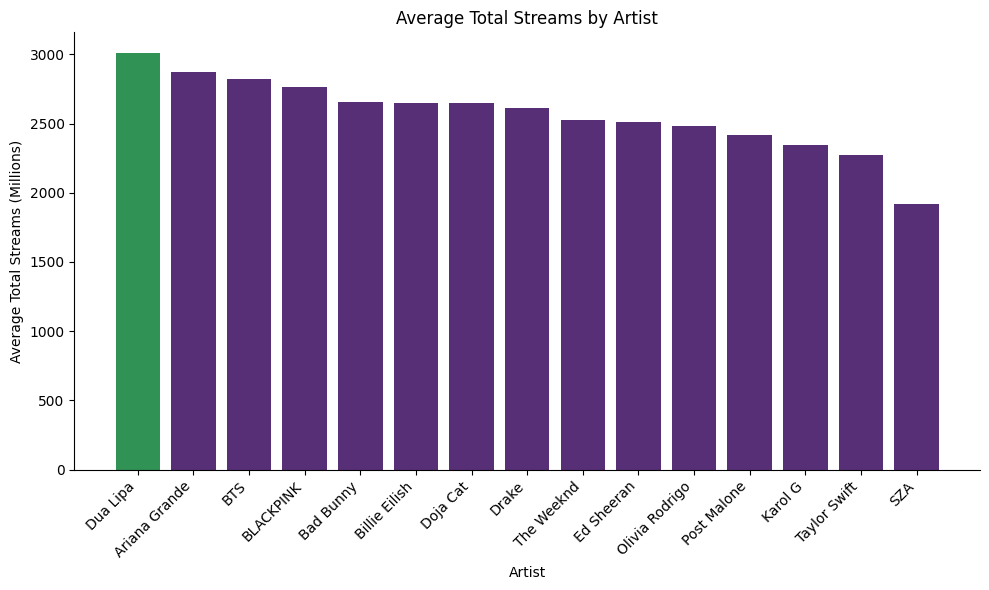

In [10]:
#create variable for artist with most streams (max_index)
#assign a unique color to the variable
#assign a custom color for all other artists
plt.figure(figsize=(10,6))
colors = ["#572F76"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#309254"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)   

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

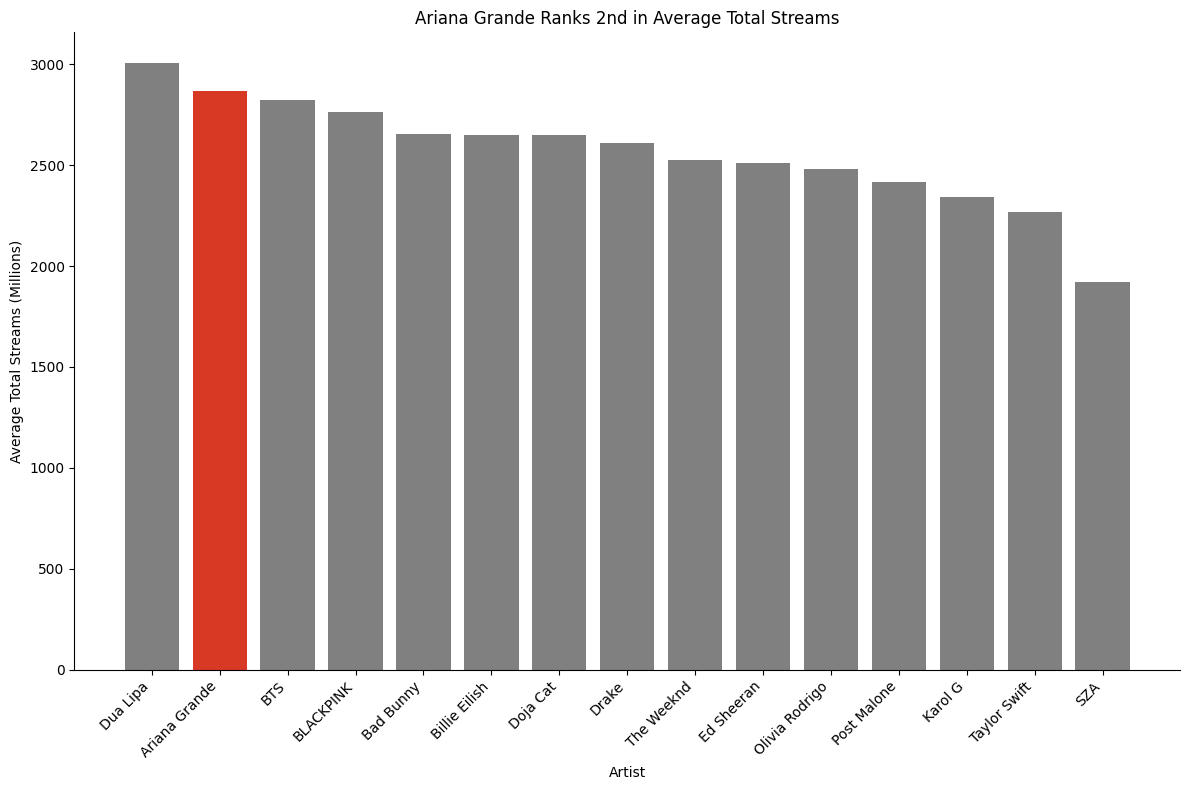

In [11]:
#create a variable for a specific artist
#assign a unique coolor to the variable
#assign a custom color for all other artists
plt.figure(figsize=(12,8))

special_artist = "Ariana Grande"
colors = ["#D83924" if artist == special_artist else "gray" for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)   

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Ariana Grande Ranks 2nd in Average Total Streams")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [12]:
#scatter plot = numbers v numbers
#look at columns to find numerical columns
spotify_df.columns
#find data types
spotify_df.dtypes




Country                             object
Artist                              object
Album                               object
Genre                               object
Release Year                         int64
Monthly Listeners (Millions)       float64
Total Streams (Millions)           float64
Total Hours Streamed (Millions)    float64
Avg Stream Duration (Min)          float64
Platform Type                       object
Streams Last 30 Days (Millions)    float64
Skip Rate (%)                      float64
dtype: object

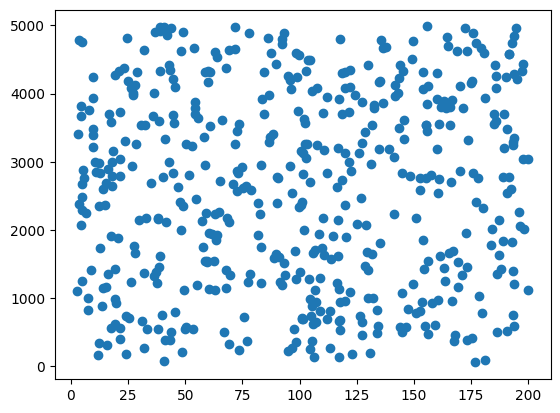

In [13]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])
plt.show()

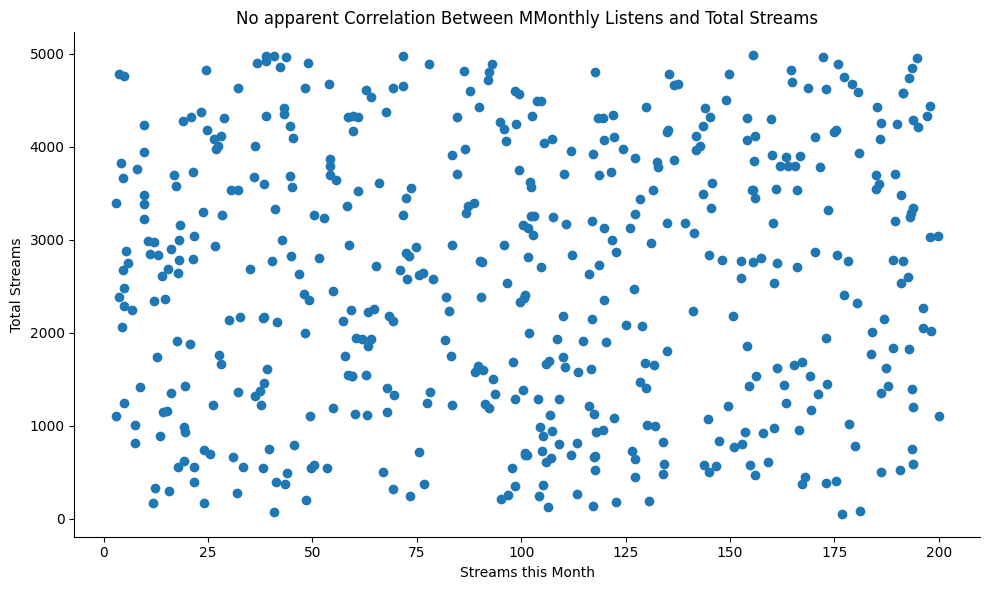

In [14]:
#enhance scatter plot with labels, title, and remove top/right spines
plt.figure(figsize=(10,6))

plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No apparent Correlation Between MMonthly Listens and Total Streams")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


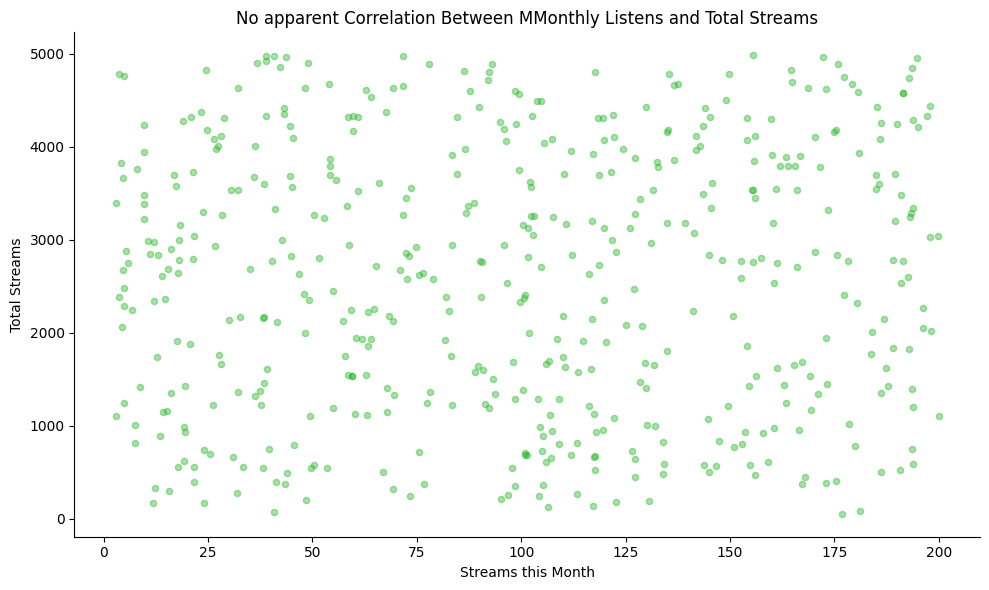

In [15]:
#customize scatter plot with color, transparency, and point size

plt.figure(figsize=(10,6))

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = "#24b524",
    alpha = 0.4,
    s= 20)

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No apparent Correlation Between MMonthly Listens and Total Streams")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

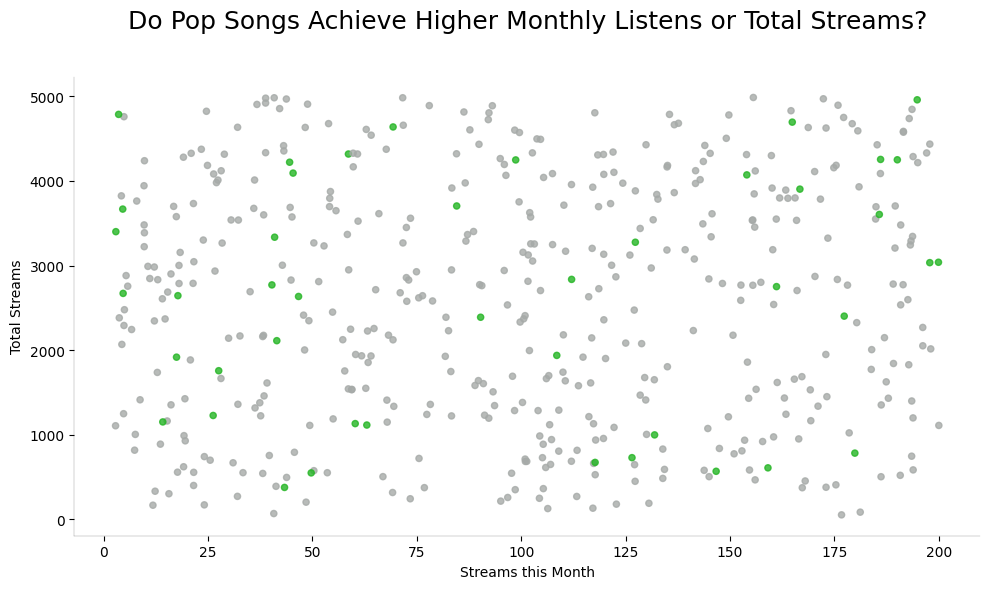

In [16]:
#highlight a specific genre in scatter plot with color, transparency, and point size

plt.figure(figsize=(10,6))

featured_genre = "Pop"

colors = ["#24b524" if genre == featured_genre else "#A6AAA8" for genre in spotify_df["Genre"]]

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = colors,
    alpha = 0.8,
    s= 20)

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Do Pop Songs Achieve Higher Monthly Listens or Total Streams?", fontsize=18, pad=35)

for spine in ax.spines.values():
    spine.set_linewidth(.25)
    spine.set_alpha(0.5)

plt.tight_layout()
plt.show()

In [17]:
#create a new dataframe showing the average total streams per release year including rounding to 2 decimal places

yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg

Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

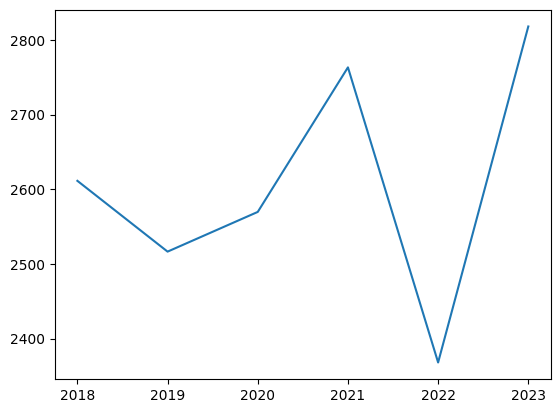

In [18]:
#plot a line chart of average total streams per release year

plt.Figure(figsize=(10,6))
plt.plot(yearly_avg.index, yearly_avg.values,)
plt.show()


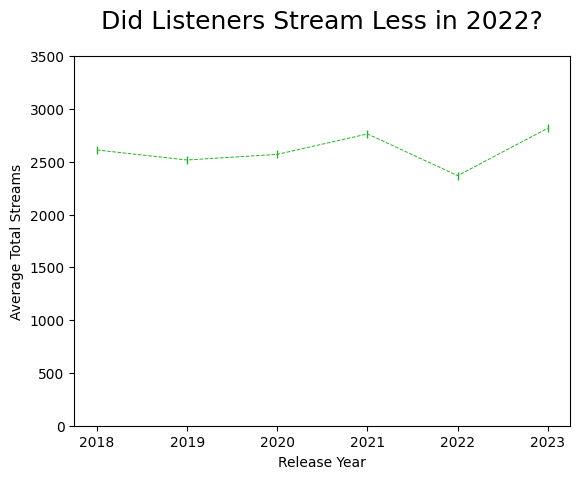

In [19]:
#plot a line chart of average total streams per release year with customizations. 
#Make line dashed with "|" markers, green color, and set y-axis limit from 0 to 3500

plt.Figure(figsize=(10,6))
plt.plot(
    yearly_avg.index, 
    yearly_avg.values,
    marker="|",
    linestyle = "--",
    color = "#24b524",
    linewidth = .7)

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2022?", fontsize = 18, pad=20)

plt.ylim(0, 3500)

plt.show()

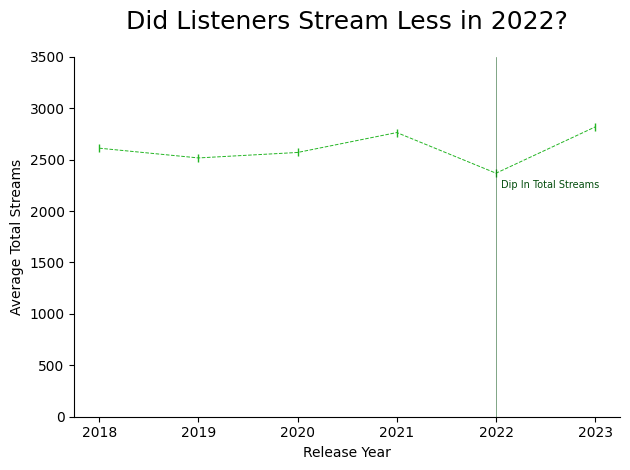

In [20]:
#add vertical line at 2022 with annotation indicating dip in total streams

plt.Figure(figsize=(10,6))
plt.plot(
    yearly_avg.index, 
    yearly_avg.values,
    marker="|",
    linestyle = "--",
    color = "#24b524",
    linewidth = .7)

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2022?", fontsize = 18, pad=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(
    2022,
    color = "#034d0d",
    linewidth = 0.5,
    alpha = 0.7)

ax.text(
    2022+0.05,
    2225,
    "Dip In Total Streams",
    color = "#034d0d",
    fontsize=7
)


plt.ylim(0, 3500)

plt.tight_layout()
plt.show()

In [21]:
#Pie chart of total streams by platform type

category = "Platform Type"
values = "Total Streams (Millions)"

platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals



Platform Type
Free       638685.97
Premium    651891.07
Name: Total Streams (Millions), dtype: float64

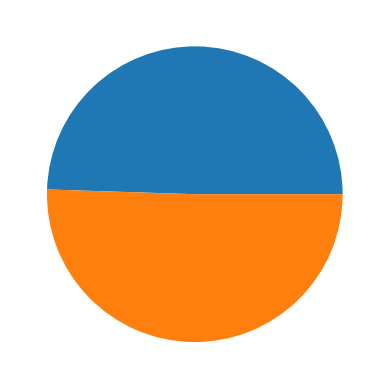

In [22]:
#Plot basic pie chart 

plt.pie(platform_totals)
plt.show()

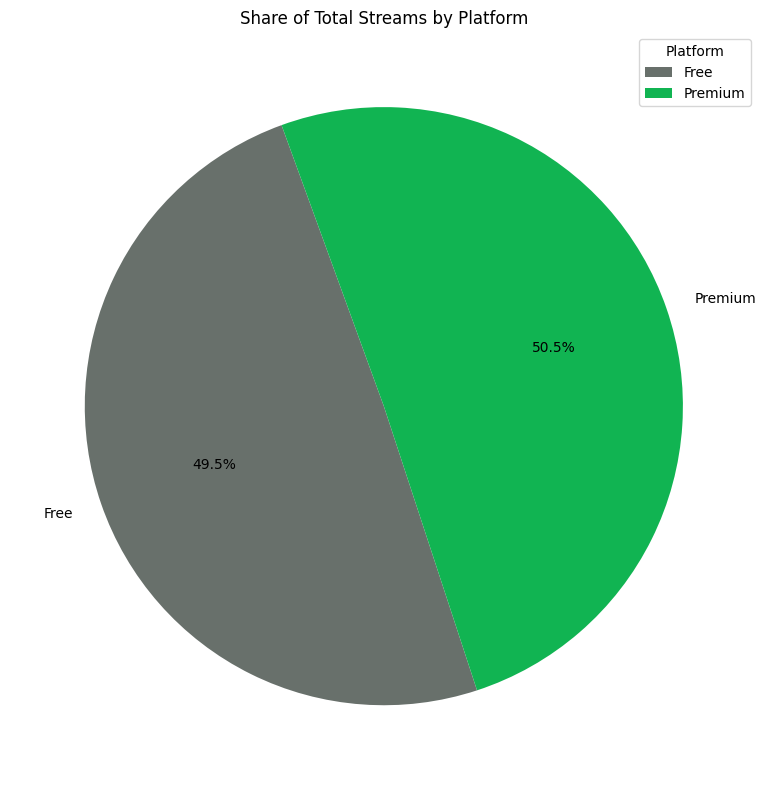

In [23]:
#Plot customized pie chart with labels, colors, title, and legend

plt.figure(figsize=(8,8))
plt.pie(
    platform_totals,
    labels=platform_totals.index,
    startangle=110,
    colors=["#68706b", "#11b452"],
    autopct="%1.1f%%",
    )

plt.title("Share of Total Streams by Platform")

plt.legend(
    labels = platform_totals.index,
    loc="best",
    title = "Platform"
)

plt.tight_layout()
plt.show()

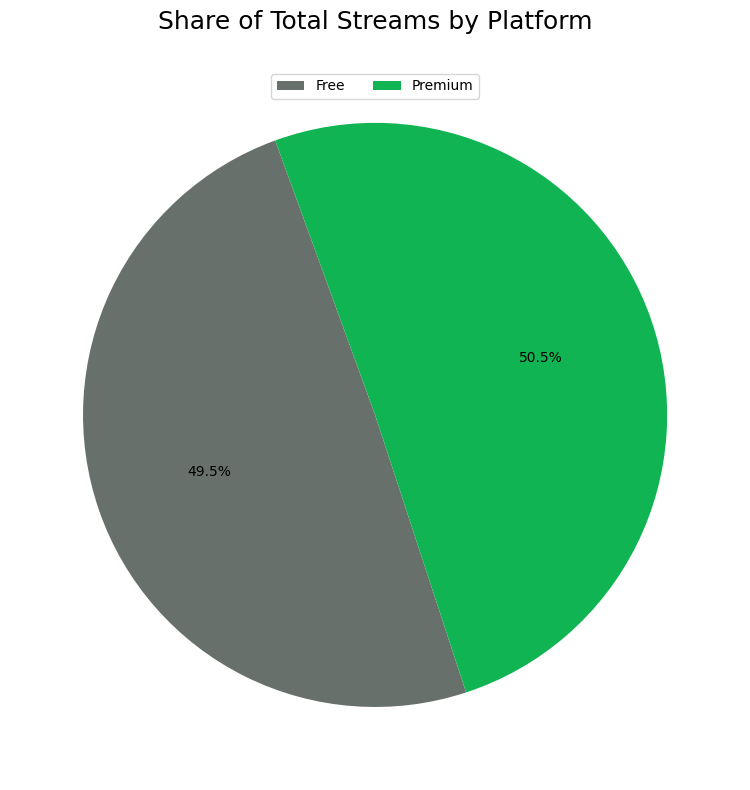

In [24]:
#Plot customized pie chart using object-oriented approach with labels, colors, title, and legend

fig, ax = plt.subplots(figsize=(8,8))


wedges, texts, autotexts = ax.pie(
    platform_totals,
    autopct="%1.1f%%",
    startangle=110,
    colors=["#68706b", "#11b452"]
)
      

ax.set_title(
    "Share of Total Streams by Platform",
    fontsize=18,
    pad=15,
    loc="center"
)



ax.legend(
    wedges,
    platform_totals.index,
    loc="center",
    bbox_to_anchor = (0.5, 0.95),
    ncol= 2
)

plt.tight_layout()
plt.show()

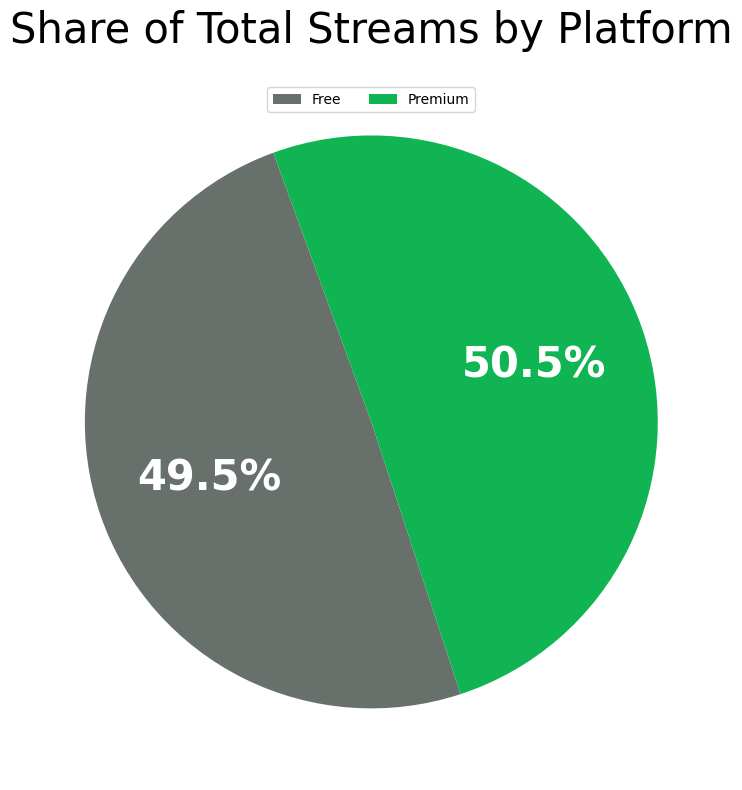

In [25]:
#change autotext using for loop


fig, ax = plt.subplots(figsize=(8,8))


wedges, texts, autotexts = ax.pie(
    platform_totals,
    autopct="%1.1f%%",
    startangle=110,
    colors=["#68706b", "#11b452"]
)
      

ax.set_title(
    "Share of Total Streams by Platform",
    fontsize=30,
    pad=15,
    loc="center"
)

for autotext in autotexts:
    autotext.set_fontsize(30)
    autotext.set_color("white")
    autotext.set_weight("bold")

ax.legend(
    wedges,
    platform_totals.index,
    loc="center",
    bbox_to_anchor = (0.5, 0.95),
    ncol= 2
)

plt.tight_layout()
plt.show()

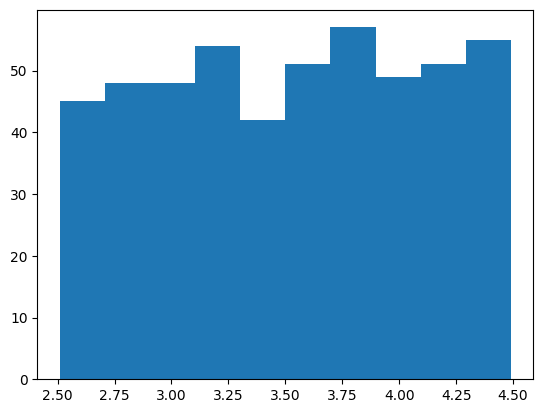

In [26]:
#Create a histogram of average stream duration (in minutes)

plt.hist(
    spotify_df["Avg Stream Duration (Min)"]
)

plt.show()

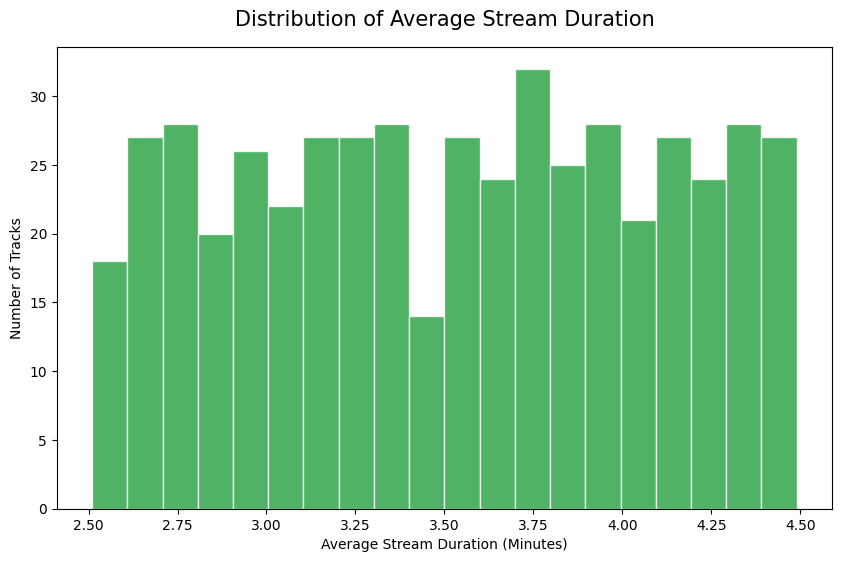

In [27]:
#Customize histogram with figure size, colors, labels, and title

plt.figure(figsize=(10,6))
plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
    bins=20,
    color="#239f3e",
    alpha=0.8,
    edgecolor="white"
)

plt.xlabel("Average Stream Duration (Minutes)")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Average Stream Duration", fontsize=15, pad=15)

plt.show()

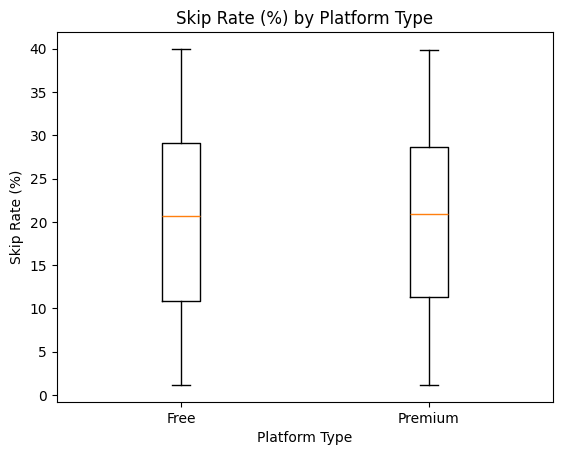

In [ ]:
#boxplot the box shows the middle 50% of the data
#the line in the middle of the box is the median
#25th and 75th percentiles (quartiles) are the edges of the box

plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
     spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1,2],["Free","Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type")

plt.show()